In [1]:
import pandas as pd

# Load the CSV file from the uploaded file in Google Colab
file_path = '/content/Cleaned_Cleaned_EV_cars_India_2023.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm it's loaded correctly
df.head()


,Batter_cap,Drive_range,Power
0,17.30,230.0,41.420
1,19.20,250.0,67.045
2,26.00,315.0,73.750
3,50.30,461.0,174.330
4,60.48,521.0,201.150


In [2]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Batter_cap     0
Drive_range    0
Power          0
dtype: int64


Summary Statistics:
       Batter_cap  Drive_range       Power
count   24.000000    24.000000   24.000000
mean    59.106667   427.104167  180.699583
std     49.489458   162.373361  132.687512
min     17.300000   230.000000   41.420000
25%     28.400000   303.750000   73.750000
50%     40.500000   433.500000  157.685000
75%     73.125000   476.000000  219.163750
max    200.000000   857.000000  633.630000


NameError: name 'plt' is not defined

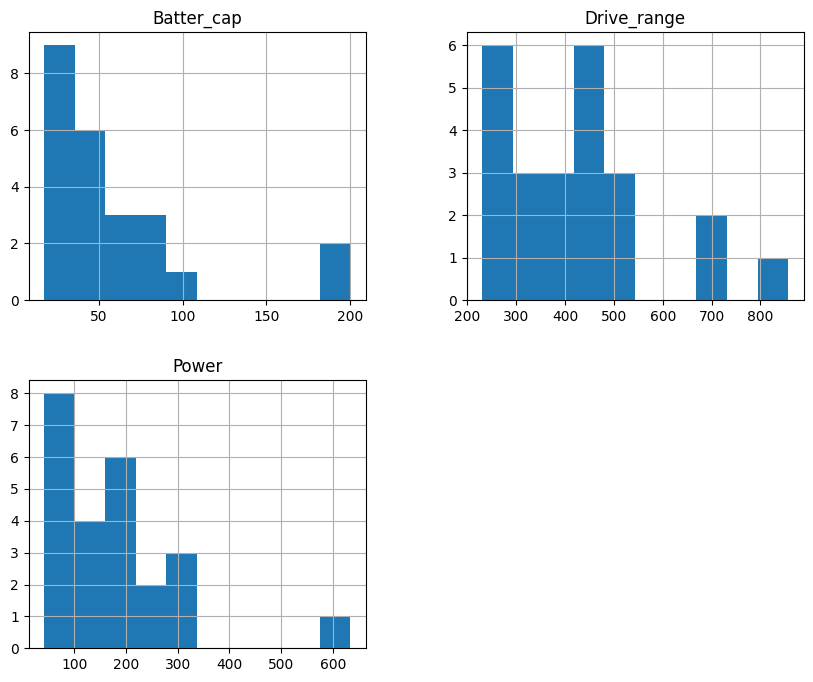

In [3]:

# 1. Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# 2. Distribution Analysis
# Histograms
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns, 1):
    plt.subplot(1, len(df.columns), i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# 3. Correlation Analysis
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 4. Pairwise Relationships
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Columns')
plt.show()

# 5. Outlier Detection (Using Boxplots)
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns, 1):
    plt.subplot(1, len(df.columns), i)
    sns.boxplot(y=df[column])
    plt.title(f'Outlier Detection - {column}')
plt.tight_layout()
plt.show()

# 6. Scaling (Optional)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display scaled data
print("Scaled Data:")
print(scaled_df.head())

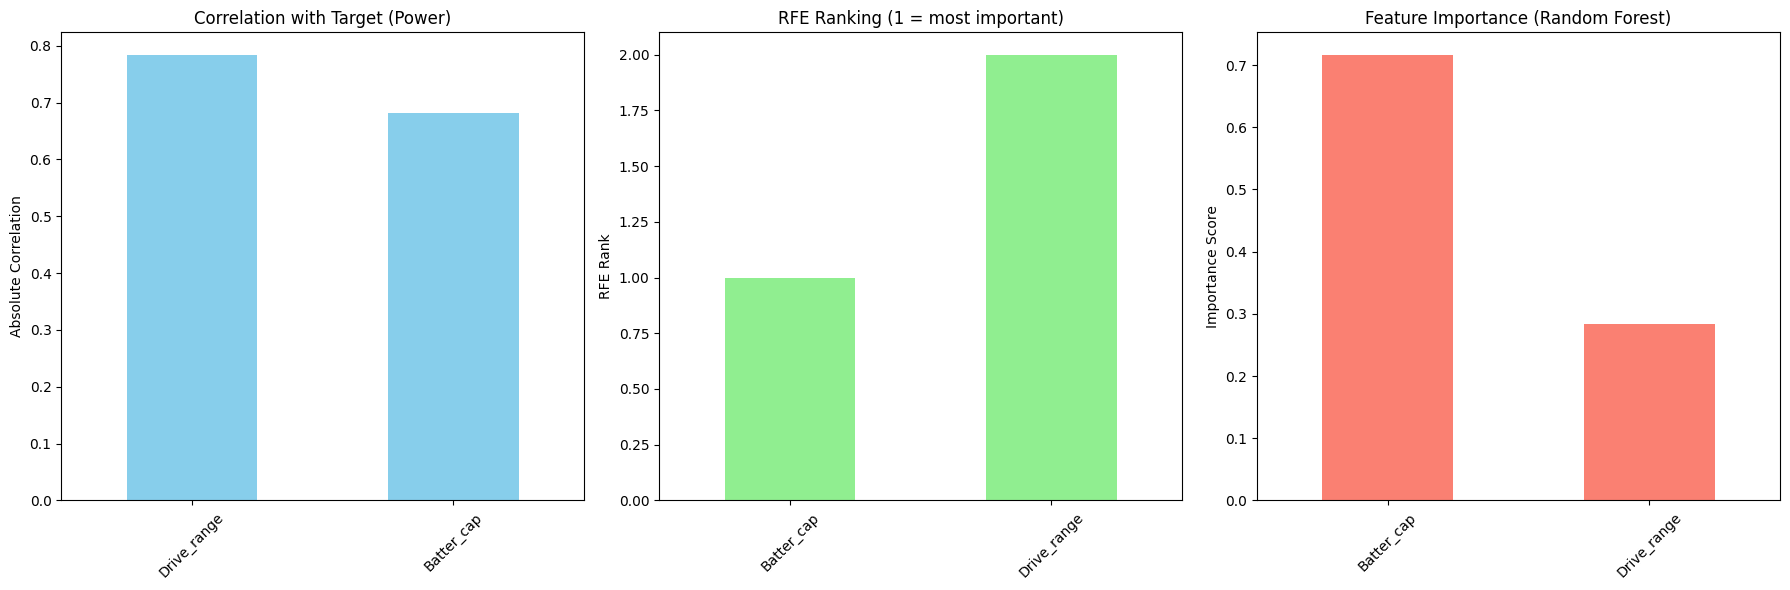

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


# Define the target variable and features
X = df.drop('Power', axis=1)
y = df['Power']

# 1. Correlation-Based Feature Selection
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Power'].drop('Power')
correlation_with_target_abs = correlation_with_target.abs().sort_values(ascending=False)

# 2. Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe = rfe.fit(X, y)
rfe_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()

# 3. Feature Importance from Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X, y)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(18, 6))

# Correlation-Based Feature Selection
plt.subplot(1, 3, 1)
correlation_with_target_abs.plot(kind='bar', color='skyblue')
plt.title('Correlation with Target (Power)')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)

# RFE Ranking
plt.subplot(1, 3, 2)
rfe_ranking.plot(kind='bar', color='lightgreen')
plt.title('RFE Ranking (1 = most important)')
plt.ylabel('RFE Rank')
plt.xticks(rotation=45)

# Feature Importance from Random Forest
plt.subplot(1, 3, 3)
feature_importances.plot(kind='bar', color='salmon')
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Early stopping at 12 trees.
Mean Squared Error: 483.1065389583335
R^2 Score: 0.9353987774532764


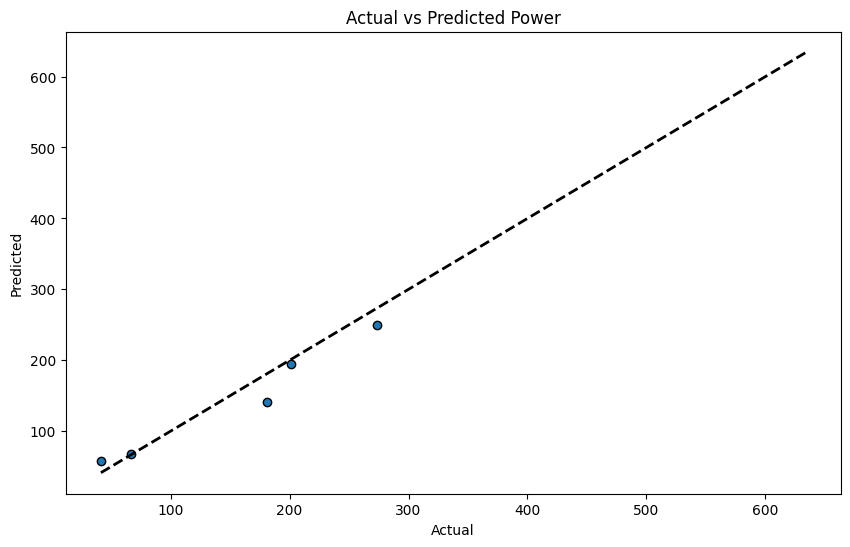

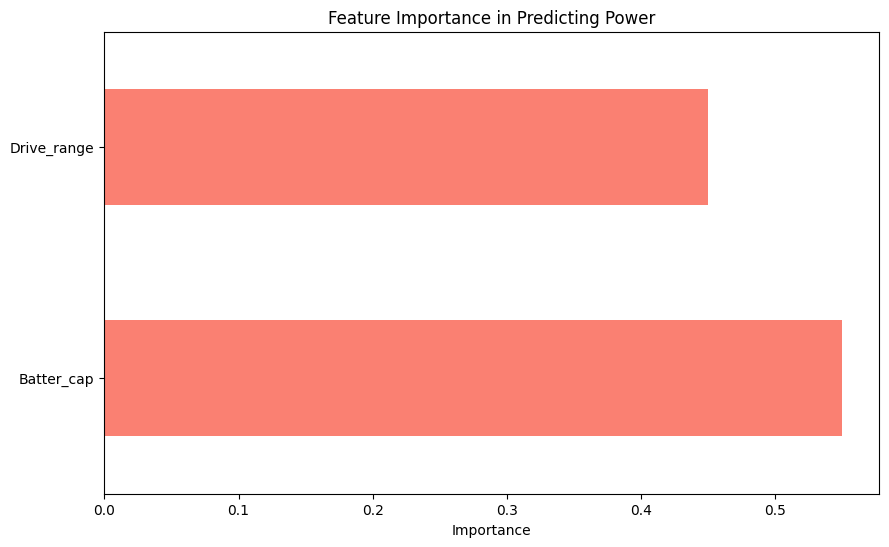

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Define the target variable and features
X = df.drop('Power', axis=1)
y = df['Power']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a list to store OOB errors
oob_errors = []

# Define the maximum number of estimators to try
max_estimators = 200

# Train a RandomForestRegressor with OOB score enabled
for n_estimators in range(1, max_estimators + 1):
    rf_model = RandomForestRegressor(n_estimators=n_estimators, oob_score=True, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    # Record the OOB error
    oob_error = 1 - rf_model.oob_score_
    oob_errors.append(oob_error)

    # Early stopping condition
    if n_estimators > 10 and oob_errors[-1] > oob_errors[-2]:
        print(f"Early stopping at {n_estimators} trees.")
        break

# Final model after early stopping
final_rf_model = rf_model

# Predict on the test set
y_pred = final_rf_model.predict(X_test)

# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Power')
plt.show()

# Assuming 'importances' and 'X.columns' are already defined as in the previous code

# Get the feature importances and their corresponding feature names
importances = final_rf_model.feature_importances_
indices = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
indices.plot(kind='barh', color='salmon')
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Power')
plt.show()


In [9]:
!pip install xgboost


[0]	train-rmse:134.02067	eval-rmse:90.13175
[1]	train-rmse:130.54225	eval-rmse:89.38037
[2]	train-rmse:126.67655	eval-rmse:86.17281
[3]	train-rmse:123.71419	eval-rmse:83.11533
[4]	train-rmse:119.94723	eval-rmse:80.19335
[5]	train-rmse:116.50587	eval-rmse:77.35604
[6]	train-rmse:113.07456	eval-rmse:74.62881
[7]	train-rmse:110.28346	eval-rmse:71.23991
[8]	train-rmse:107.02435	eval-rmse:69.10531
[9]	train-rmse:105.41759	eval-rmse:67.15976
[10]	train-rmse:102.40449	eval-rmse:64.77413
[11]	train-rmse:99.55078	eval-rmse:62.75651
[12]	train-rmse:96.72301	eval-rmse:60.41608
[13]	train-rmse:95.16921	eval-rmse:58.06048
[14]	train-rmse:92.67325	eval-rmse:56.14798
[15]	train-rmse:90.01872	eval-rmse:53.50277
[16]	train-rmse:87.66439	eval-rmse:52.02478
[17]	train-rmse:85.46165	eval-rmse:50.45765
[18]	train-rmse:83.20315	eval-rmse:49.05713
[19]	train-rmse:81.05274	eval-rmse:47.75949
[20]	train-rmse:79.12041	eval-rmse:46.25804
[21]	train-rmse:76.92008	eval-rmse:44.37530
[22]	train-rmse:76.00844	eval-r

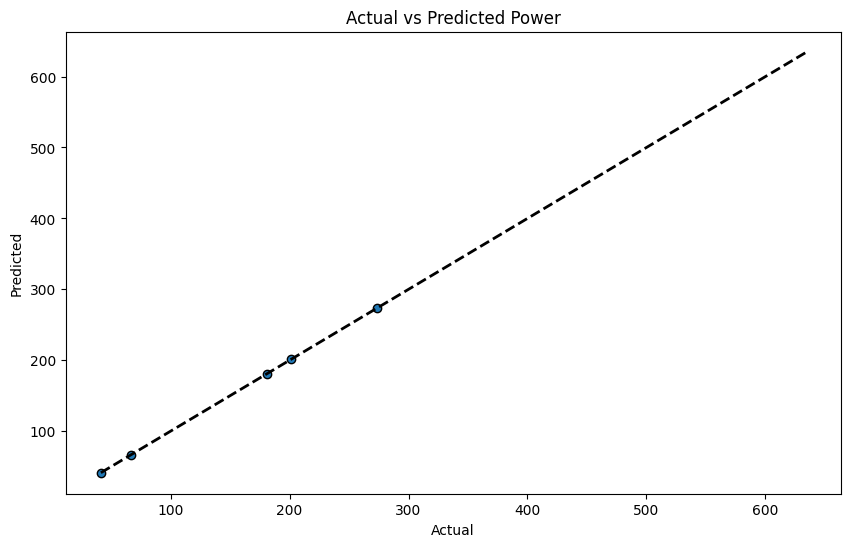

<Figure size 1000x600 with 0 Axes>

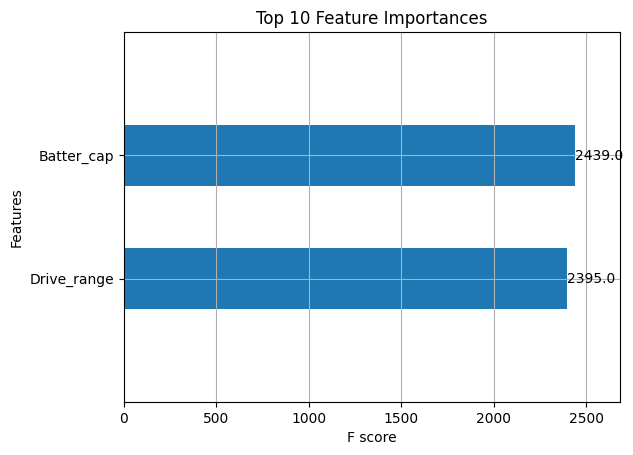

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Define the target variable and features
X = df.drop('Power', axis=1)
y = df['Power']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format (specific to XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Train the model with early stopping
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals,
                      early_stopping_rounds=10, verbose_eval=True)

# Predict on the test set
y_pred = xgb_model.predict(dtest)

# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Power')
plt.show()

# Plot the feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Top 10 Feature Importances')
plt.show()


In [15]:
!pip install tensorflow


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 60046.6602 - val_loss: 33402.6719
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - loss: 60111.5508 - val_loss: 33396.1602
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 60024.0625 - val_loss: 33389.7852
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 59985.5586 - val_loss: 33383.2500
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 60064.1133 - val_loss: 33376.8086
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 59945.9258 - val_loss: 33370.3477
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 59985.4141 - val_loss: 33363.7031
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 59990.1055 - val_loss: 33356.9688
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 59942.6328 - val_loss: 33350.0820
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 59983.3281 - val_loss: 33343.0820
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 59954.0000 - val_l

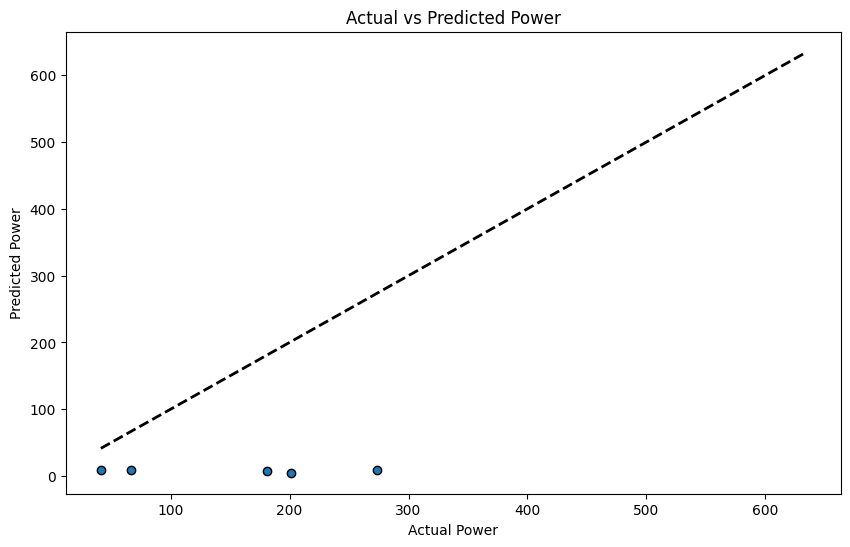

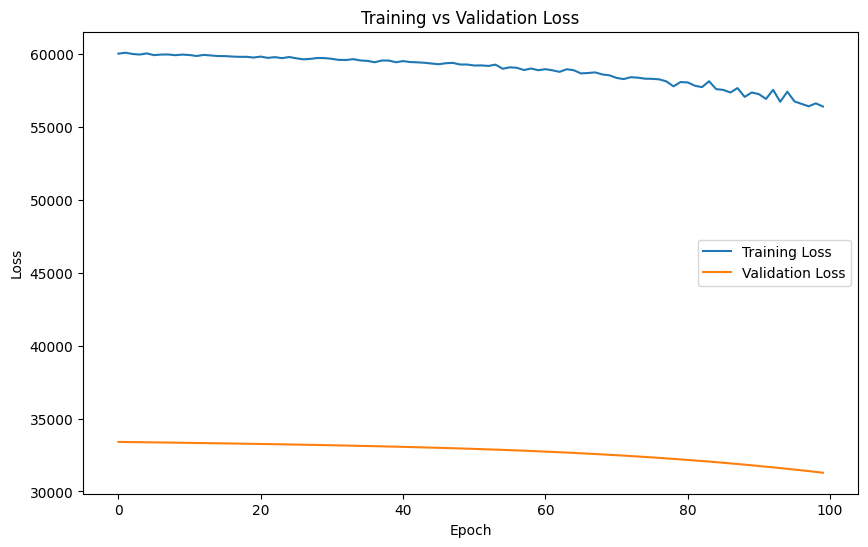

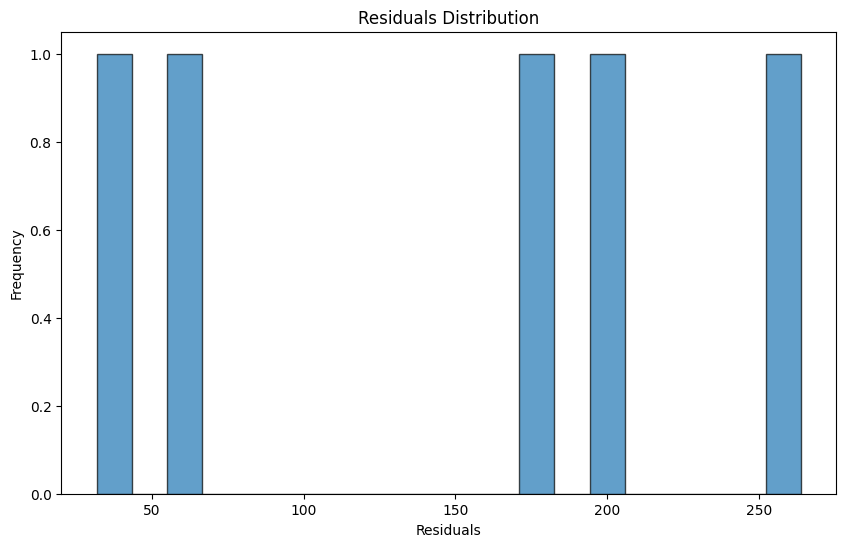

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Define the target variable and features
X = df.drop('Power', axis=1)
y = df['Power']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the FCNN model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with validation data
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Actual vs Predicted Power')
plt.show()

# Plot: Training vs Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot: Residuals (Error) Distribution
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 59973.4453 - val_loss: 33376.2188
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 59942.9570 - val_loss: 33366.0586
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 59912.8672 - val_loss: 33355.0586
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 59913.7930 - val_loss: 33343.8203
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 59901.6914 - val_loss: 33332.2383
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 59804.2148 - val_loss: 33319.6719
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 59848.2656 - val_loss: 33306.4375
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 59765.9805 - val_loss: 33292.3906
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step - loss: 59737.9219 - val_loss: 33277.8516
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 59795.6172 - val_loss: 33262.9336
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 59682.2930 - v

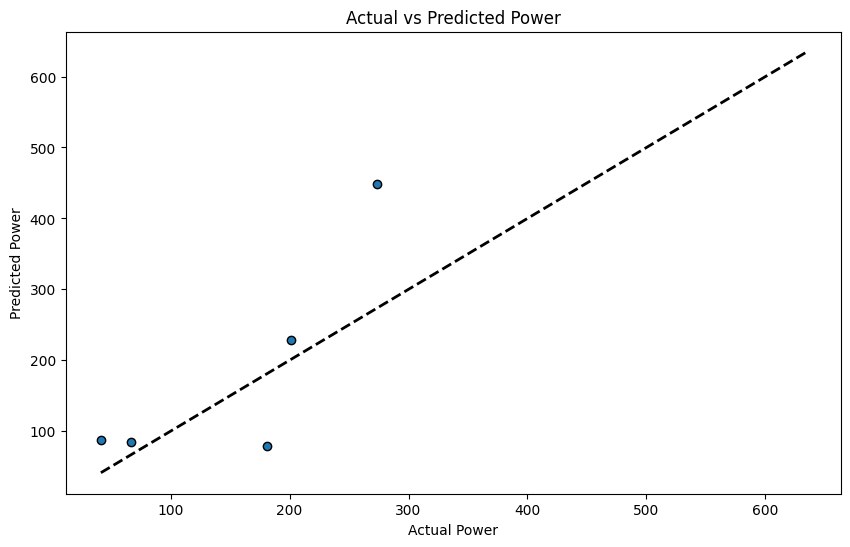

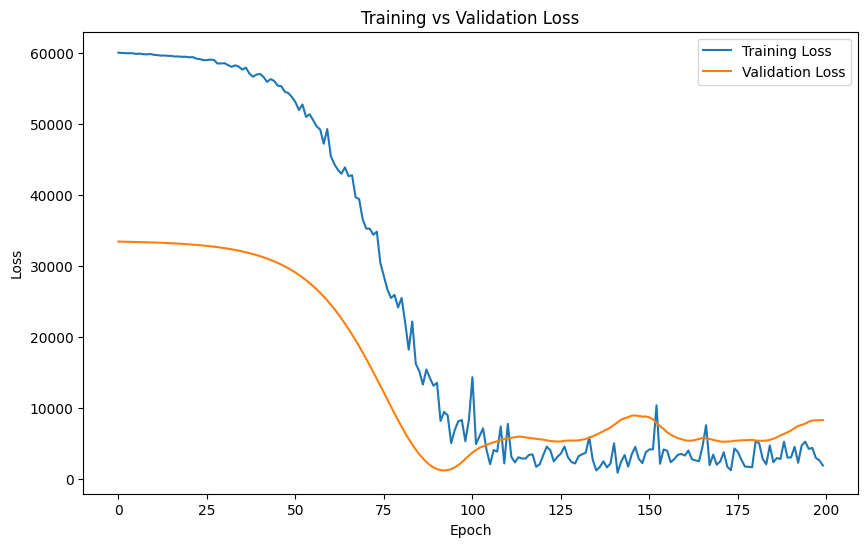

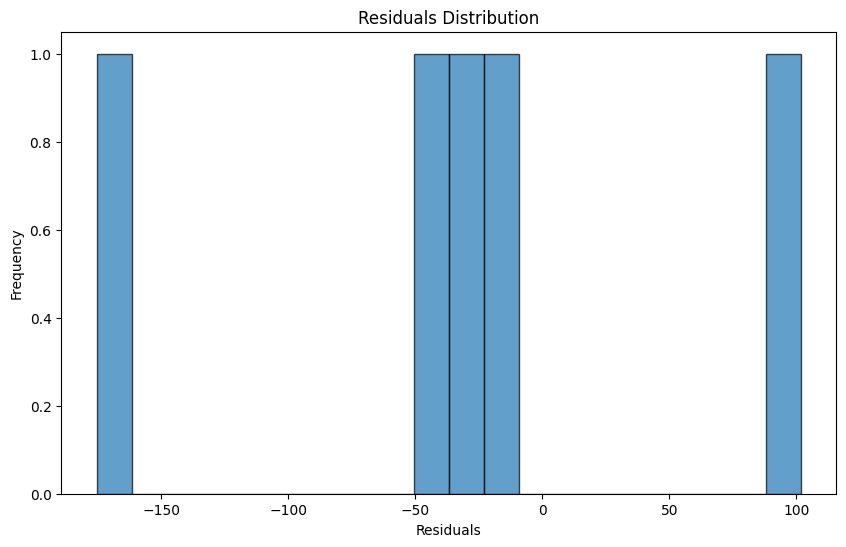

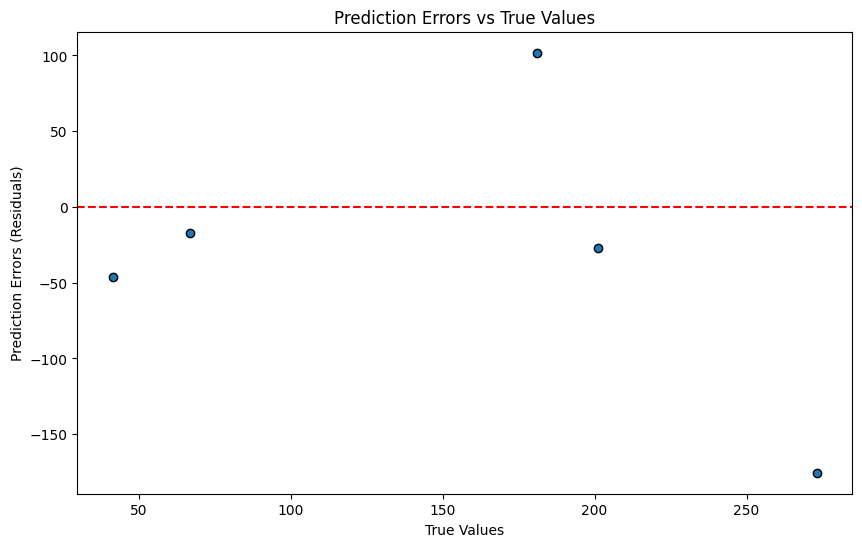

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



# Define the target variable and features
X = df.drop('Power', axis=1)
y = df['Power']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Deep FNN model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with validation data
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Actual vs Predicted Power')
plt.show()

# Plot: Training vs Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot: Residuals (Error) Distribution
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

# Plot: Prediction Errors vs True Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, edgecolors=(0, 0, 0))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Prediction Errors (Residuals)')
plt.title('Prediction Errors vs True Values')
plt.show()


In [18]:
!pip install scikit-learn


Mean Squared Error: 6676.022093594302
R^2 Score: 0.10727933858016858


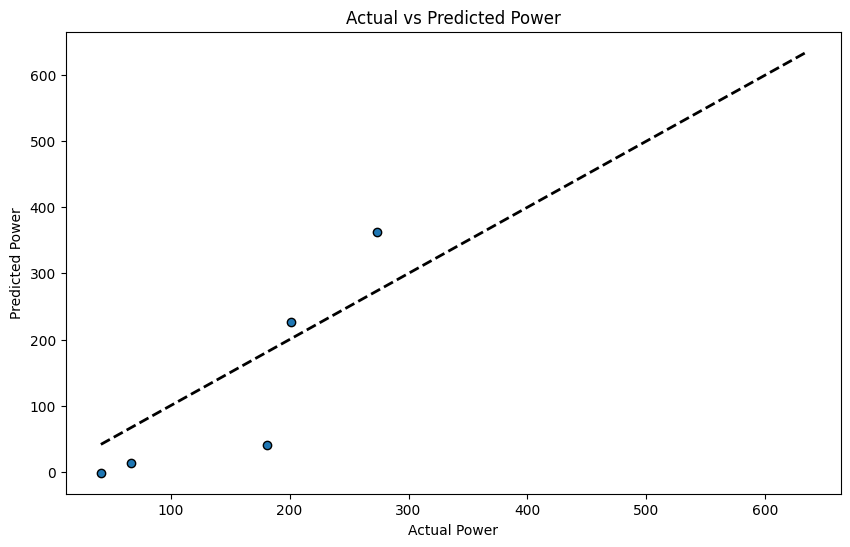

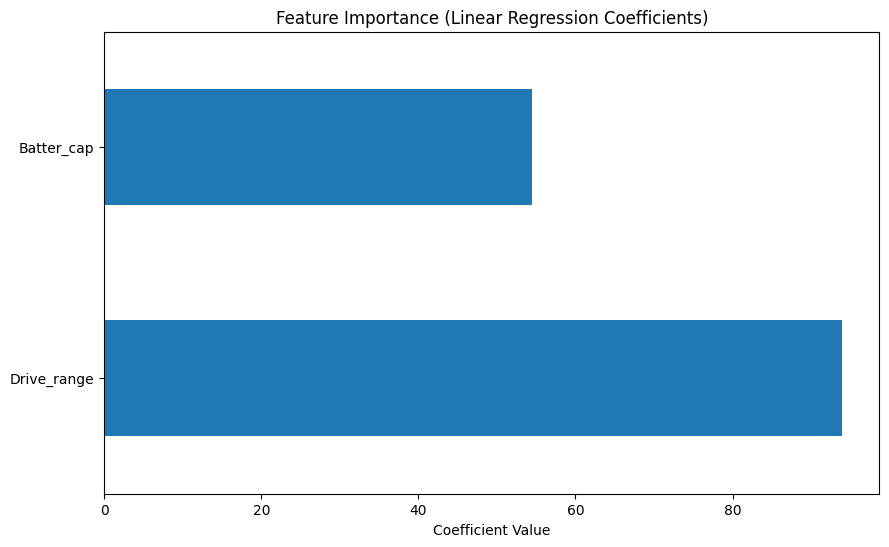

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression



# Define the target variable and features
X = df.drop('Power', axis=1)
y = df['Power']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the pipeline for scaling and regression with early stopping
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', SGDRegressor(max_iter=1000, tol=1e-3, early_stopping=True, validation_fraction=0.2, n_iter_no_change=5, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Actual vs Predicted Power')
plt.show()

# Feature importance using coefficients
coefficients = pipeline.named_steps['regressor'].coef_
feature_importance = pd.Series(coefficients, index=X.columns)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()


In [20]:
!pip install lightgbm


Mean Squared Error: 6542.233232271248
R^2 Score: 0.1251696449776747


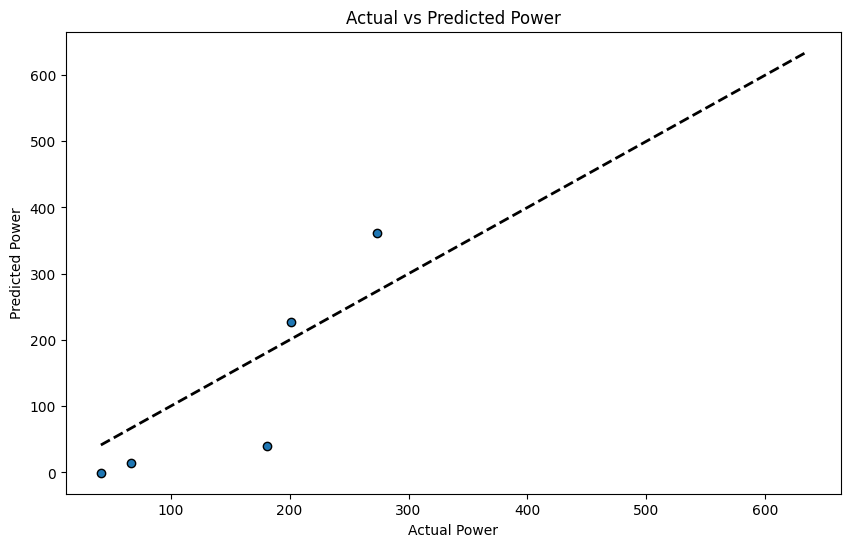

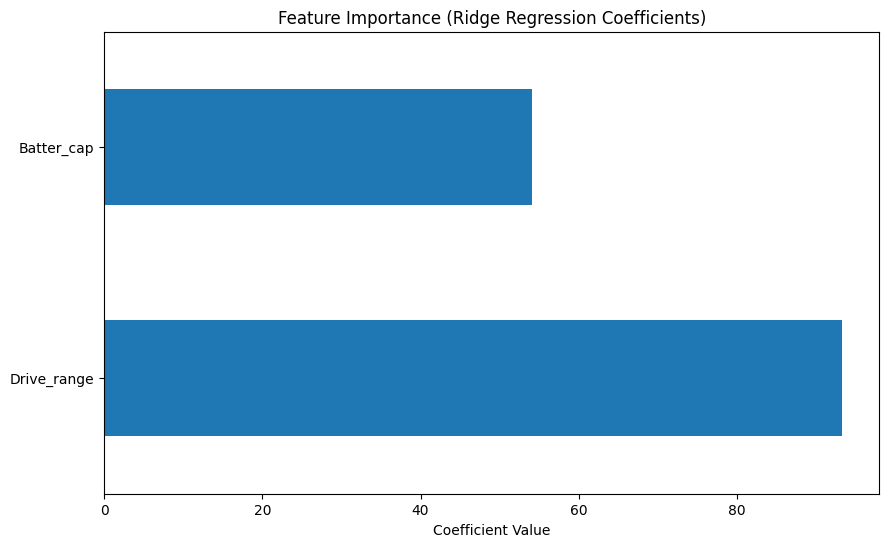

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Define the target variable and features
X = df.drop('Power', axis=1)
y = df['Power']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge Regression model using SGD with early stopping
ridge_regressor = SGDRegressor(
    penalty='l2',  # This corresponds to Ridge Regression
    alpha=0.01,    # Ridge regularization strength
    max_iter=1000, # Maximum number of iterations
    tol=1e-3,      # Tolerance for stopping criteria
    early_stopping=True,
    validation_fraction=0.2,  # Fraction of training data to use for validation
    n_iter_no_change=5,       # Number of iterations with no improvement to wait before stopping
    random_state=42
)

# Train the model
ridge_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = ridge_regressor.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Actual vs Predicted Power')
plt.show()

# Plot: Feature Importance
coefficients = ridge_regressor.coef_
feature_importance = pd.Series(coefficients, index=X.columns)

plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Ridge Regression Coefficients)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mean Squared Error: 797.8225099169293
R^2 Score: 0.893314817002768


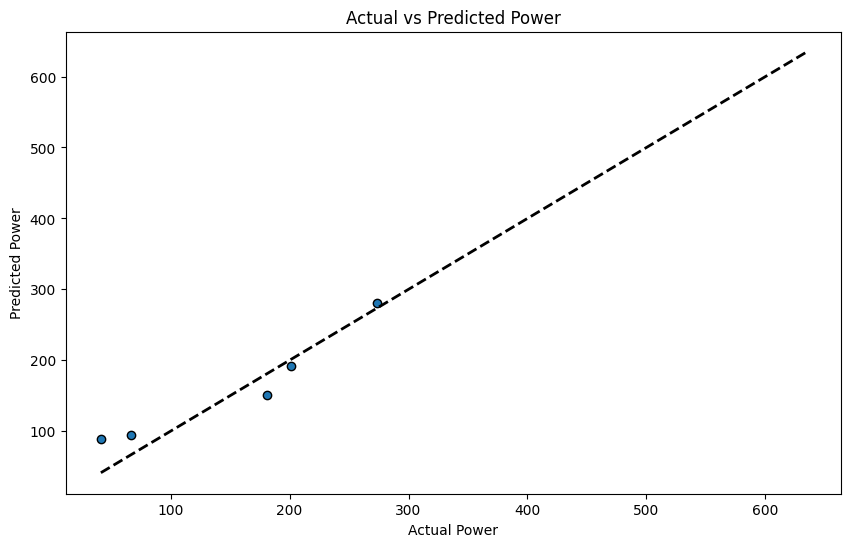

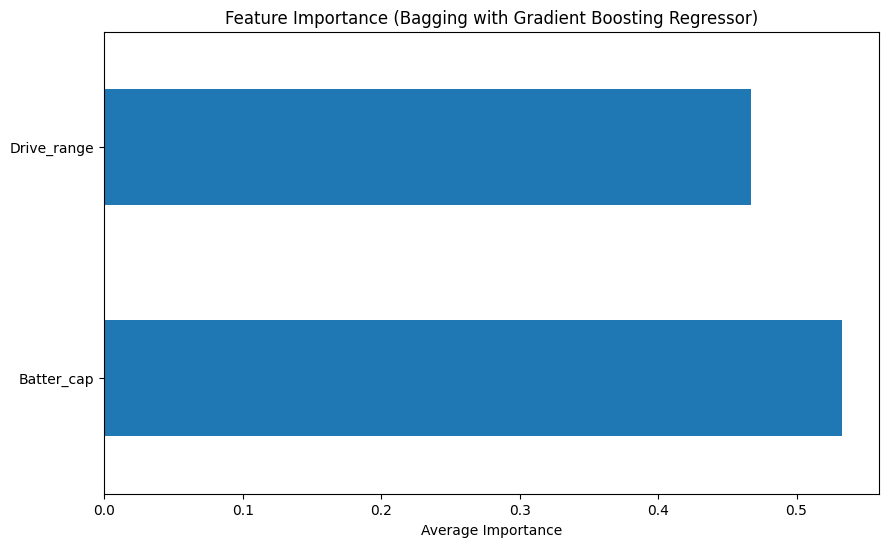

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



# Define the target variable and features
X = df.drop('Power', axis=1)
y = df['Power']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the base estimator with early stopping (Gradient Boosting Regressor)
base_estimator = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    validation_fraction=0.2,
    n_iter_no_change=10,
    tol=1e-4,
    random_state=42
)

# Initialize the Bagging Regressor with the base estimator
bagging_regressor = BaggingRegressor(
    base_estimator=base_estimator,
    n_estimators=10,  # Number of base models
    random_state=42,
    n_jobs=-1
)

# Train the model
bagging_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = bagging_regressor.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Actual vs Predicted Power')
plt.show()

# Plot: Feature Importance from the base estimator
# Feature importances are averaged over all the base models
importances = np.mean([est.feature_importances_ for est in bagging_regressor.estimators_], axis=0)
feature_importance = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Average Importance')
plt.title('Feature Importance (Bagging with Gradient Boosting Regressor)')
plt.show()
